## Dependencies

In [1]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [2]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf

In [3]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

### Keras Specific Dependencies

In [5]:
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

## Loading and Preprocessing our Data

### Load the MNIST Handwriting Dataset from Keras

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
Training Data Info
Training Data Shape: (60000, 28, 28)
Training Data Labels Shape: (60000,)


In [9]:
y_train

5

### Plot the first digit

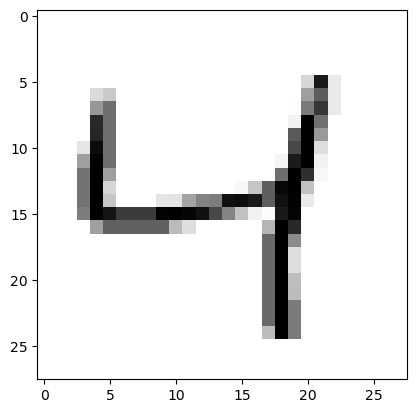

In [12]:
# Plot the first image from the dataset
plt.imshow(X_train[2,:,:], cmap=plt.cm.Greys)

### Each Image is a 28x28 Pixel greyscale image with values from 0 to 255

In [13]:
# Our image is an array of pixels ranging from 0 to 255
X_train[0, :, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### For training a model, we want to flatten our data into rows of 1D image arrays

In [14]:
# We want to flatten our image of 28x28 pixels to a 1D array of 784 pixels
ndims = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (60000, 784)
Testing Shape: (10000, 784)


## Scaling and Normalization

We use Sklearn's MinMaxScaler to normalize our data between 0 and 1

In [15]:
# Next, we normalize our training data to be between 0 and 1
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Alternative way to normalize this dataset since we know that the max pixel value is 255
# X_train = X_train.astype("float32")
# X_test = X_test.astype("float32")
# X_train /= 255.0
# X_test /= 255.0

## One-Hot Encoding

We need to one-hot encode our integer labels using the `to_categorical` helper function

In [16]:
# Our Training and Testing labels are integer encoded from 0 to 9
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [17]:
# We need to convert our target labels (expected values) to categorical data
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Original label of `5` is one-hot encoded as `0000010000`
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Building our Model

In this example, we are going to build a Deep Multi-Layer Perceptron model with 2 hidden layers.

## Our first step is to create an empty sequential model

In [18]:
# Create an empty sequential model
model = Sequential()

## Next, we add our first hidden layer

In the first hidden layer, we must also specify the dimension of our input layer. This will simply be the number of elements (pixels) in each image.

In [19]:
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

## We then add a second hidden layer with 100 densely connected nodes

A dense layer is when every node from the previous layer is connected to each node in the current layer.

In [20]:
# Add a second hidden layer
model.add(Dense(100, activation='relu'))

## Our final output layer uses a `softmax` activation function for logistic regression.

We also need to specify the number of output classes. In this case, the number of digits that we wish to classify.

In [21]:
# Add our final output layer where the number of nodes 
# corresponds to the number of y labels
model.add(Dense(num_classes, activation='softmax'))

## Model Summary

In [22]:
# We can summarize our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


## Compile and Train our Model

Now that we have our model architecture defined, we must compile the model using a loss function and optimizer. We can also specify additional training metrics such as accuracy.

In [23]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Finally, we train our model using our training data

Training consists of updating our weights using our optimizer and loss function. In this example, we choose 10 iterations (loops) of training that are called epochs.

We also choose to shuffle our training data and increase the detail printed out during each training cycle.

In [24]:
# Fit (train) the model
model.fit(
    X_train,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
1875/1875 - 4s - loss: 0.2435 - accuracy: 0.9293 - 4s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.1064 - accuracy: 0.9675 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.0731 - accuracy: 0.9769 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.0558 - accuracy: 0.9819 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.0451 - accuracy: 0.9852 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.0362 - accuracy: 0.9883 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.0303 - accuracy: 0.9896 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.0261 - accuracy: 0.9914 - 4s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 4s - loss: 0.0229 - accuracy: 0.9926 - 4s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 4s - loss: 0.0197 - accuracy: 0.9931 - 4s/epoch - 2ms/step


## Saving and Loading models

We can save our trained models using the HDF5 binary format with the extension `.h5`

In [25]:
# Save the model
model.save("mnist_trained.h5")

In [26]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("mnist_trained.h5")

## Evaluating the Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [27]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

313/313 - 1s - loss: 0.1138 - accuracy: 0.9740 - 763ms/epoch - 2ms/step
Loss: 0.11382301896810532, Accuracy: 0.9739999771118164


## Making Predictions

We can use our trained model to make predictions using `model.predict`

In [28]:
# Grab just one data point to test with
test = np.expand_dims(X_train[0], axis=0)
test.shape

(1, 784)

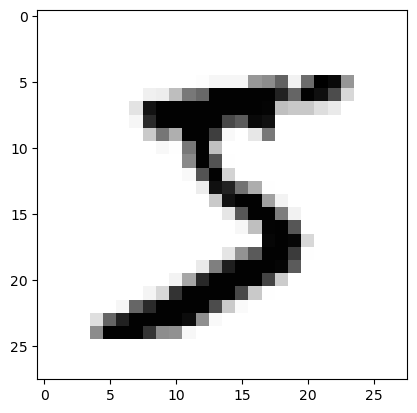

In [29]:
plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

In [36]:
demo = scaler.inverse_transform(test).reshape(28, 28)  #use the scaler to turn the transformed data back to it's untransformed value
demo

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [37]:
# Make a prediction. The result should be 0000010000000 for a 5
model.predict(test).round()

1/1 [==============================] - 0s 28ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [38]:
# Grab just one data point to test with
test = np.expand_dims(X_train[2], axis=0)
test.shape

(1, 784)

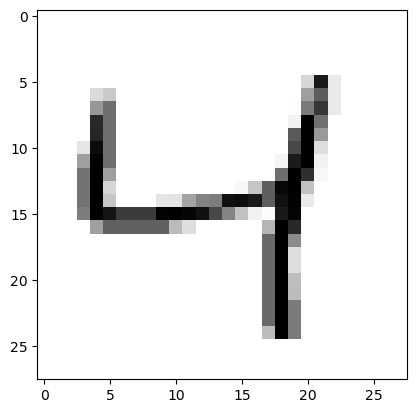

In [39]:
plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

In [40]:
# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {np.argmax(model.predict(test),axis=1)}")

1/1 [==============================] - 0s 26ms/step
One-Hot-Encoded Prediction: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 37ms/step
Predicted class: [4]


# Import a Custom Image

In [55]:
filepath = "https://static.bc-edx.com/data/dl-1-2/m23/lessons/1/img/test2.png"
filepath = "http://127.0.0.1:5500/Extra_Resources/MNIST/test23.png"

In [56]:
from urllib.request import urlopen
from io import BytesIO
from tensorflow.keras.preprocessing import image
image_size = (28, 28)
with urlopen(filepath) as raw:
    im = image.load_img(BytesIO(raw.read()), target_size=image_size, color_mode="grayscale")
im

In [57]:
# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [58]:
image[0][0]

array([255.], dtype=float32)

In [59]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

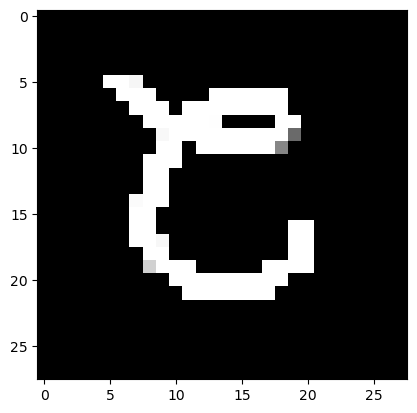

In [60]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

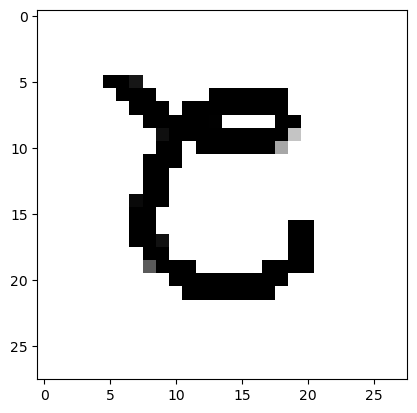

In [61]:
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [62]:
# Make predictions
np.argmax(model.predict(img),axis=1)

1/1 [==============================] - 0s 27ms/step


array([0], dtype=int64)